In [2]:
# keras_001-part1_chap3-simple_mnist_example
#
# 김태영, 블록과 함께 하는 파이썬 딥러닝 케라스
# Part1. 케라스 시작하기
# Chapter3. 윈도우에서 케라스 설치하기
# 2018-10-02 (화)

# p.28, 7. 설치환경 테스트해보기

import scipy
import numpy
import matplotlib
import pandas
import sklearn
import h5py

#import theano
import tensorflow
import keras

print( 'scipy' + scipy.__version__ )
print( 'numpy' + numpy.__version__ )
print( 'matplotlib' + matplotlib.__version__ )
print( 'pandas' + pandas.__version__ )
print( 'sklearn' + sklearn.__version__ )
print( 'h5py' + h5py.__version__ )

#print( 'theano' + theano.__version__ )
print( 'tensorflow' + tensorflow.__version__ )
print( 'keras' + keras.__version__ )

scipy1.1.0
numpy1.14.5
matplotlib2.2.3
pandas0.23.4
sklearn0.19.1
h5py2.8.0
tensorflow1.10.0
keras2.2.3


In [ ]:
# p.30, 딥러닝 기본 모델 구동 확인

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784).astype('float32') / 255.0
x_test = x_test.reshape(10000,784).astype('float32') / 255.0
y_train = np_utils.to_categorical( y_train )
y_test = np_utils.to_categorical( y_test )

model = Sequential()
model.add( Dense( units = 64, input_dim = 28*28, activation = 'relu') )
model.add( Dense( units = 10, activation = 'softmax') )
model.compile( loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'] )
model.fit( x_train, y_train, epochs = 5, batch_size = 32 )
loss_and_metrics = model.evaluate( x_test, y_test, batch_size = 32 )

print('loss_and_metrics : ' + str( loss_and_metrics) )


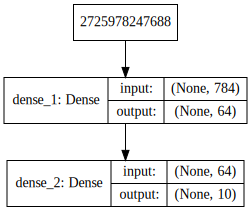

In [3]:
# p.31, 딥러닝 모델 가시화 기능 확인

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG( model_to_dot( model, show_shapes=True).create( prog='dot', format='svg') )

In [4]:
# p.31, 딥러닝 모델 저장 기능 확인

from keras.models import load_model

model.save('mnist_mlp_model.h5')
model = load_model('mnist_mlp_model.h5')
